# COVID-19 VACCINATION DATA ANALYSIS

In [5]:
from IPython.display import display,HTML
display(HTML('''<img src="https://www.clinicaltrialsarena.com/wp-content/uploads/sites/33/2021/05/Pfizer-BioNTech-COVID-19-vaccine-.jpg">'''))

# Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import re
import time
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("country_vaccinations.csv")
print(df)

           country iso_code        date  total_vaccinations  \
0      Afghanistan      AFG  2021-02-22                 0.0   
1      Afghanistan      AFG  2021-02-23                 NaN   
2      Afghanistan      AFG  2021-02-24                 NaN   
3      Afghanistan      AFG  2021-02-25                 NaN   
4      Afghanistan      AFG  2021-02-26                 NaN   
...            ...      ...         ...                 ...   
32903     Zimbabwe      ZWE  2021-07-18           1785533.0   
32904     Zimbabwe      ZWE  2021-07-19           1827638.0   
32905     Zimbabwe      ZWE  2021-07-20           1897337.0   
32906     Zimbabwe      ZWE  2021-07-21           1949472.0   
32907     Zimbabwe      ZWE  2021-07-22           2017101.0   

       people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
0                    0.0                      NaN                     NaN   
1                    NaN                      NaN                     NaN   
2           

# Information About Dataset

In [3]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [4]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.831100e+04,1.749700e+04,1.468100e+04,1.511000e+04,3.265800e+04,18311.000000,17497.000000,14681.000000,32658.000000
mean,1.315759e+07,6.075168e+06,3.541179e+06,2.340181e+05,1.173427e+05,31.093574,20.077021,13.253641,3465.829751
std,7.348462e+07,2.235227e+07,1.294119e+07,1.272292e+06,8.481313e+05,36.423283,21.285824,16.663424,4555.649667
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.338495e+05,1.079780e+05,5.077800e+04,4.434000e+03,8.320000e+02,3.225000,2.700000,1.420000,422.000000
50%,9.502520e+05,6.886960e+05,3.906290e+05,2.177350e+04,6.312500e+03,15.900000,11.470000,6.050000,1941.500000
75%,4.604929e+06,3.051383e+06,1.797397e+06,9.817475e+04,3.645825e+04,47.910000,33.110000,19.200000,5203.750000
max,1.538707e+09,6.220000e+08,2.232990e+08,2.474100e+07,2.242429e+07,232.700000,116.730000,115.970000,118759.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32908 entries, 0 to 32907
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              32908 non-null  object 
 1   iso_code                             32908 non-null  object 
 2   date                                 32908 non-null  object 
 3   total_vaccinations                   18311 non-null  float64
 4   people_vaccinated                    17497 non-null  float64
 5   people_fully_vaccinated              14681 non-null  float64
 6   daily_vaccinations_raw               15110 non-null  float64
 7   daily_vaccinations                   32658 non-null  float64
 8   total_vaccinations_per_hundred       18311 non-null  float64
 9   people_vaccinated_per_hundred        17497 non-null  float64
 10  people_fully_vaccinated_per_hundred  14681 non-null  float64
 11  daily_vaccinations_per_milli

In [6]:
df.shape

(32908, 15)

In [7]:
df.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

In [8]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     14597
people_vaccinated                      15411
people_fully_vaccinated                18227
daily_vaccinations_raw                 17798
daily_vaccinations                       250
total_vaccinations_per_hundred         14597
people_vaccinated_per_hundred          15411
people_fully_vaccinated_per_hundred    18227
daily_vaccinations_per_million           250
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [9]:
#converting date column to datatype to date
df["date"]=pd.to_datetime(df.date)
datetime=df.dtypes['date']
print(datetime)

datetime64[ns]


In [10]:
#Top countries with most vaccinations
df["total_vaccination(count)"]=df.groupby("country").total_vaccinations.tail()
df.groupby("country")["total_vaccination(count)"].mean().sort_values(ascending=False).head(20)

country
China             1.508260e+09
India             4.235548e+08
United States     3.397524e+08
Brazil            1.297697e+08
Germany           8.785987e+07
United Kingdom    8.302717e+07
Japan             7.216644e+07
England           6.957689e+07
France            6.646466e+07
Turkey            6.491685e+07
Italy             6.388270e+07
Indonesia         6.025741e+07
Mexico            5.714433e+07
Russia            5.606119e+07
Spain             5.231232e+07
Canada            4.674620e+07
Poland            3.328233e+07
Argentina         2.865536e+07
Chile             2.483227e+07
Colombia          2.429882e+07
Name: total_vaccination(count), dtype: float64

# DATA VISUALIZATION

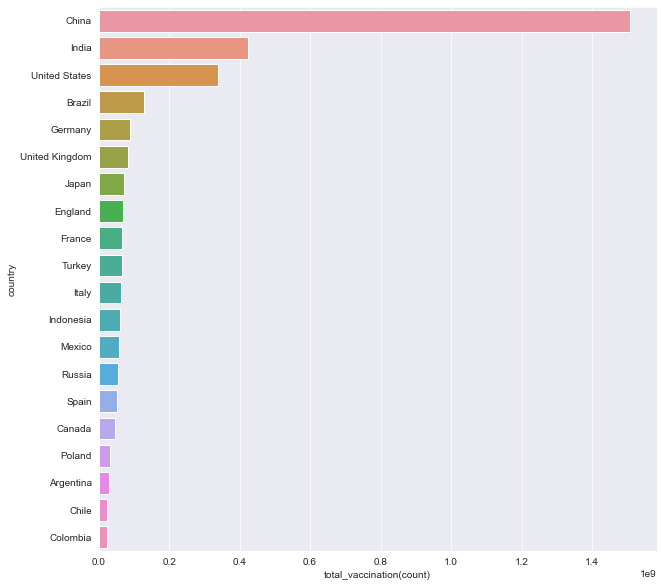

In [11]:
#barplot visualization of top countries with most vaccinations
x=df.groupby("country")["total_vaccination(count)"].mean().sort_values(ascending=False).head(20)
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
ax=sns.barplot(x.values,x.index)
ax.set_xlabel("total_vaccination(count)")
ax.set_ylabel("country")
plt.show()

In [32]:
#Top countries with fully vaccinated peoples
df["Full_vaccinations(count)"]=df.groupby("country").people_fully_vaccinated.tail(1)

df.groupby("country")["Full_vaccinations(count)"].mean().sort_values(ascending=False).head(20)

country
United States     162725812.0
India              92763169.0
Germany            40816711.0
Brazil             37145993.0
United Kingdom     36953691.0
England            30909329.0
France             29774321.0
Japan              29384382.0
Italy              28934137.0
Spain              25398978.0
Mexico             23602901.0
Russia             22751923.0
Turkey             22597613.0
Canada             20654519.0
Indonesia          17475996.0
Poland             16881997.0
Chile              11888753.0
Colombia           11042971.0
Morocco             9794265.0
Netherlands         8298549.0
Name: Full_vaccinations(count), dtype: float64

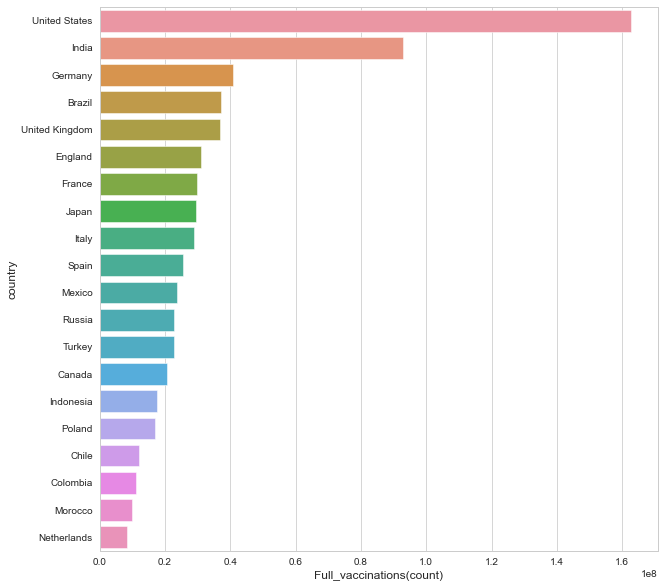

In [33]:
#barplot visualization of top countries with fully vaccinated peoples
x=df.groupby("country")["Full_vaccinations(count)"].mean().sort_values(ascending=False).head(20)
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
ax=sns.barplot(x.values,x.index)
ax.set_xlabel("Full_vaccinations(count)")
ax.set_ylabel("country")
plt.show()

In [34]:
#Vaccine types
x=df.vaccines.unique()
y=list(x)
for i in y:
    print(i)

Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V
Sputnik V
Oxford/AstraZeneca, Pfizer/BioNTech
Oxford/AstraZeneca
Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V
Oxford/AstraZeneca, Sinovac, Sputnik V
Pfizer/BioNTech
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing
Sinopharm/Beijing, Sputnik V
Oxford/AstraZeneca, Sinopharm/Beijing
Oxford/AstraZeneca, Sinovac
Moderna, Pfizer/BioNTech
Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac
Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech
Covaxin, Oxford/AstraZeneca
Sinopharm/Beijing
CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac
CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac
Covaxin, Oxford/AstraZeneca, Sinopharm/

In [35]:
#most common vaccines
df.vaccines.value_counts()

Oxford/AstraZeneca                                                                             4857
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                  4288
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                                   2909
Oxford/AstraZeneca, Sinopharm/Beijing                                                          2551
Oxford/AstraZeneca, Pfizer/BioNTech                                                            1965
Moderna, Pfizer/BioNTech                                                                       1540
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V                              1509
Pfizer/BioNTech                                                                                1221
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                                                    960
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V                                         668


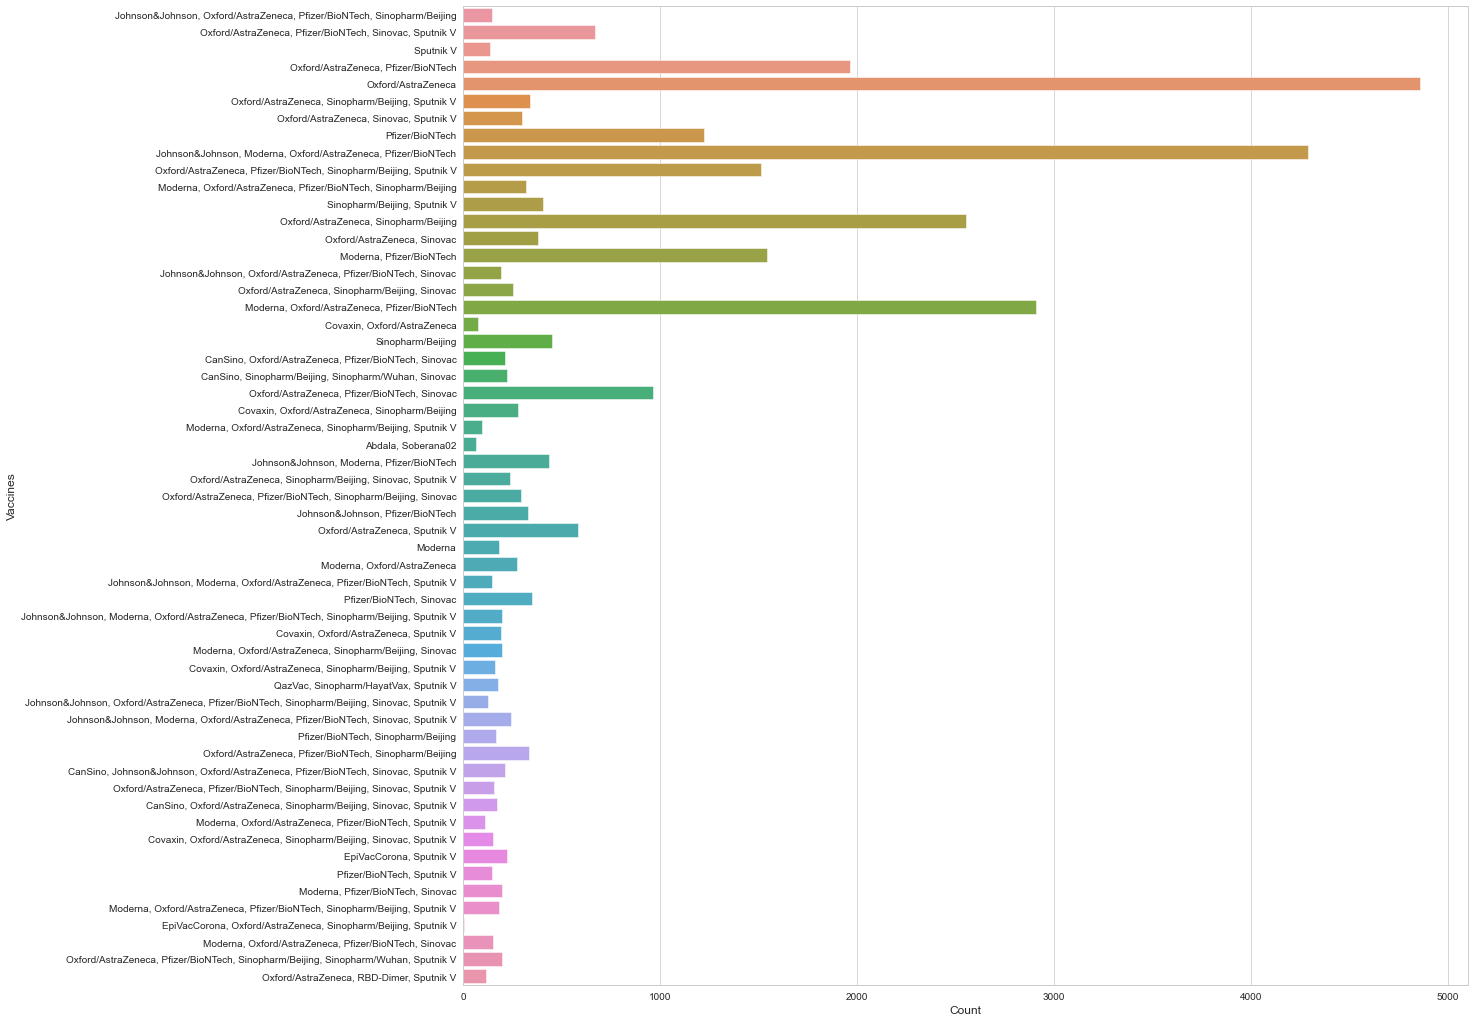

In [36]:
plt.figure(figsize=(18,18))
sns.countplot(y="vaccines",data=df)
plt.xlabel("Count")
plt.ylabel("Vaccines")
plt.show()

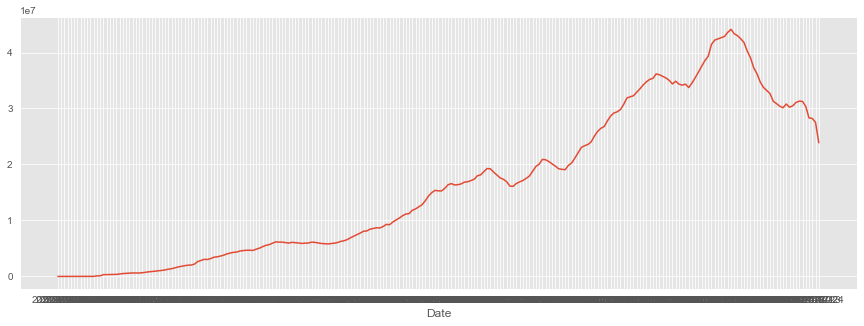

In [37]:
#daily vaccinations
x=df.groupby("date").daily_vaccinations.sum()
plt.style.use("ggplot")
plt.figure(figsize=(15,5))
sns.lineplot(x.index,x.values)
plt.xlabel("Date")
plt.show()

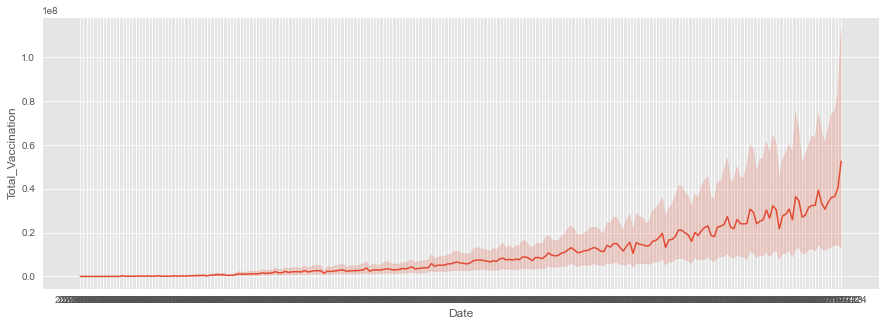

In [38]:
#total vaccinations
plt.figure(figsize=(15,5))
sns.lineplot(x="date",y="total_vaccinations",data=df)
plt.xlabel("Date")
plt.ylabel("Total_Vaccination")
plt.show()

In [39]:
#Countries with best daily average vaccinations
x=df.groupby("country").daily_vaccinations.mean().sort_values(ascending=False).head(20)
x

country
China             6.760574e+06
India             2.211523e+06
United States     1.569893e+06
Brazil            6.787640e+05
Japan             4.647420e+05
Germany           4.204075e+05
United Kingdom    3.738594e+05
Turkey            3.400444e+05
France            3.182663e+05
Indonesia         3.094062e+05
England           3.059087e+05
Italy             3.029701e+05
Mexico            2.671365e+05
Spain             2.609262e+05
Russia            2.494407e+05
Canada            2.089443e+05
Poland            1.603016e+05
Colombia          1.545736e+05
South Korea       1.498179e+05
Argentina         1.367610e+05
Name: daily_vaccinations, dtype: float64

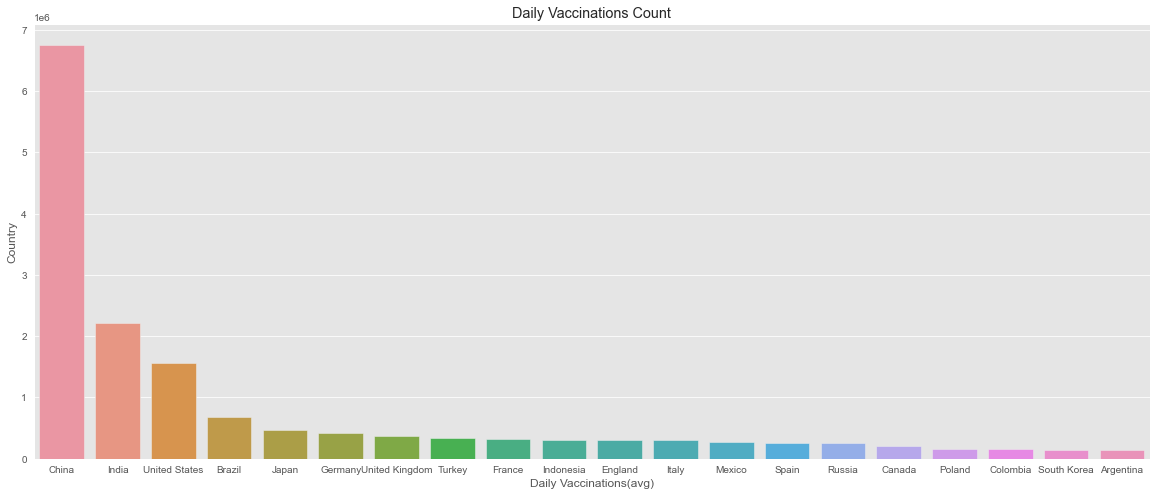

In [40]:
#daily vaccinations barplot
plt.figure(figsize=(20,8))
ax=sns.barplot(x.index,x.values)
ax.set_title("Daily Vaccinations Count")
ax.set_xlabel("Daily Vaccinations(avg)")
ax.set_ylabel("Country")
plt.show()

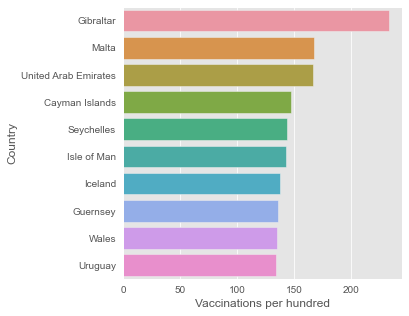

In [41]:
#vaccination per hundred top countries
df["Total_vaccinations_per_hundred"]= df.groupby("country").total_vaccinations_per_hundred.tail(1)
x= df.groupby("country")["Total_vaccinations_per_hundred"].mean().sort_values(ascending= False).head(10)
plt.figure(figsize= (5,5))
ax= sns.barplot(x.values,x.index)
ax.set_ylabel("Country")
ax.set_xlabel("Vaccinations per hundred")
plt.show()

In [43]:
#creating dataframe for top 5 vaccinated countries
x=df.loc[(df.country=="United States") | (df.country=="China")|(df.country=="India") | (df.country=="England")|(df.country=="United Kingdon")]

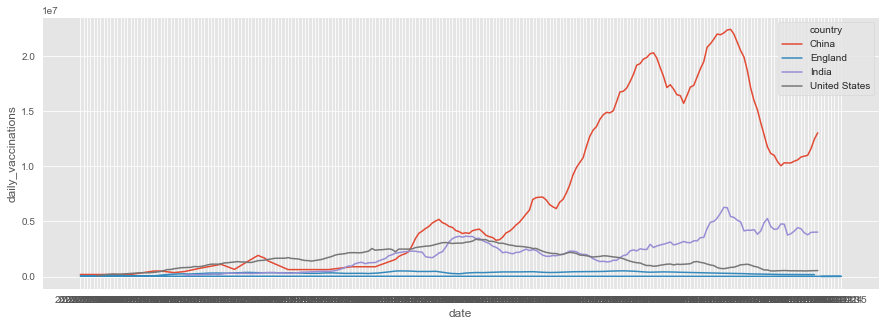

In [45]:
#daily vaccination comparison
plt.figure(figsize=(15,5))
sns.lineplot(x="date",y="daily_vaccinations",data=x,hue="country")
plt.show()

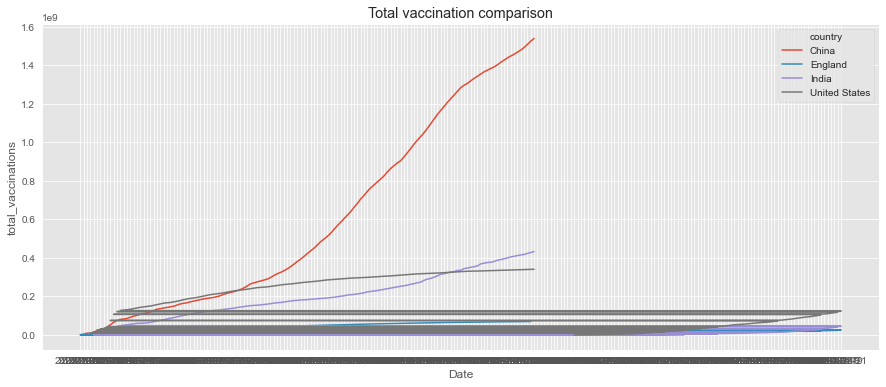

In [48]:
#total vaccination comparison
plt.figure(figsize= (15,6))
sns.lineplot(x= "date",y= "total_vaccinations" ,data= x,hue= "country")
plt.xlabel("Date")
plt.title("Total vaccination comparison")
plt.show()